# Energy time spectrum

(1024, 1001)


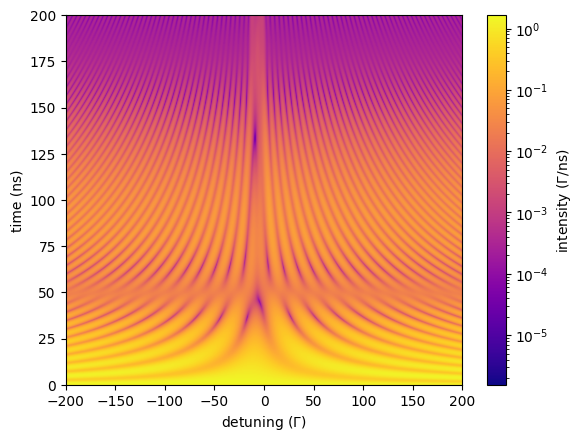

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# ----------------- cavity in reflection geometry -------------

# ------------------------- Fe layer --------------------------
lay_Fe = nx.Layer(id = "Fe",
                material = nx.Material.Template(nx.lib.material.Fe_enriched),
                thickness = 1.5,
                roughness = 0.3)

site1 = nx.Hyperfine(magnetic_field = 0)

lay_Fe.material.hyperfine_sites = [site1]

# ----------------------------- Pt layers -----------------------------
lay_Pt_top = nx.Layer(id = "Pt top",
                material = nx.Material.Template(nx.lib.material.Pt),
                thickness = 2,
                roughness = 0.3)

lay_Pt = nx.Layer(id = "Pt",
                material = nx.Material.Template(nx.lib.material.Pt),
                thickness = 15,
                roughness = 0.3)

# -------------------------- C ---------------------------

lay_C = nx.Layer(id = "C",
                material = nx.Material.Template(nx.lib.material.C),
                thickness = 10,
                roughness = 0.3)

# --------------------- substrate ---------------------------------
lay_substrate = nx.Layer(id = "Si sub",
                material = nx.Material.Template(nx.lib.material.Si),
                thickness = nx.inf,
                roughness = 0.3)

sample_cavity = nx.Sample(id = "simple layers",
                          layers = [lay_Pt_top,
                                    lay_C,
                                    lay_Fe,
                                    lay_C,
                                    lay_Pt,
                                    lay_substrate],
                           geometry = "r",
                           angle = 0.148,
                           roughness = "a")

# ------------- Stainless steel foil in forward geometry ----------------
foil = nx.Layer(id = "StainSteel",
                material = nx.Material.Template(nx.lib.material.SS_enriched),
                thickness = 3000)

site_foil = nx.Hyperfine(
    isomer = -0.09,  # mm/s
    quadrupole = 0.6,
    isotropic = True)

foil.material.hyperfine_sites = [site_foil]

sample_foil = nx.Sample(id = "simple foil ",
                        layers = [foil],
                        geometry = "f")

beam  = nx.Beam()
beam.LinearSigma()

exp = nx.Experiment(beam = beam,
                    objects = [sample_cavity, sample_foil],
                    isotope = nx.moessbauer.Fe57,
                    id = "my exp")

# define a detuning for the sample on the drive
sample_foil.drive_detuning = np.linspace(-200, 200, 1024)  # Gamma

ets = nx.EnergyTimeSpectrum(experiment = exp,
                            time_length = 200.0,
                            time_step = 0.2,
                            mode = "i",
                            electronic = False)

timescale, intensity = ets()

print(intensity.shape)

plt.imshow(intensity.T,
           cmap=plt.cm.plasma,
           norm=colors.LogNorm(),
           aspect='auto',
           origin = 'lower',
           extent=(min(sample_foil.drive_detuning), max(sample_foil.drive_detuning), min(timescale), max(timescale)))

plt.colorbar(orientation='vertical', label = r'intensity ($\Gamma$/ns)')
plt.xlabel(r'detuning ($\Gamma$)')
plt.ylabel('time (ns)')
plt.show()

In [2]:
print(intensity)

[[9.41565510e-01 1.28722972e+00 1.51686987e+00 ... 3.70885537e-04
  3.99640547e-04 4.17898274e-04]
 [9.41567634e-01 1.28729284e+00 1.51708834e+00 ... 2.84146374e-04
  3.24384097e-04 3.53640409e-04]
 [9.41569676e-01 1.28735576e+00 1.51730646e+00 ... 1.90746771e-04
  2.32510736e-04 2.65438445e-04]
 ...
 [8.42207577e-01 1.09063566e+00 1.20111870e+00 ... 4.05007478e-04
  4.06989376e-04 4.03389996e-04]
 [8.42032212e-01 1.09025522e+00 1.20045302e+00 ... 3.85589818e-04
  3.64106297e-04 3.43410395e-04]
 [8.41856869e-01 1.08987491e+00 1.19978778e+00 ... 3.26562044e-04
  2.85243215e-04 2.51467781e-04]]


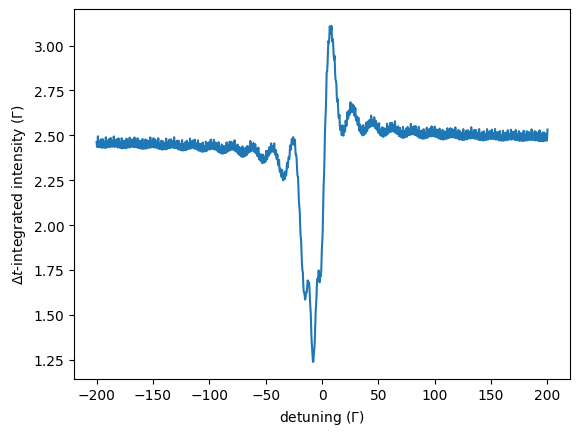

In [6]:
int_energy_time_spec = nx.IntegratedEnergyTimeSpectrum(experiment = exp,
                                                       time_length = 200.0,
                                                       time_step = 0.2,
                                                       integration_start = 51,
                                                       integration_stop = 180,
                                                       mode = "i",
                                                       electronic = False)

intensity_int = int_energy_time_spec()

plt.plot(sample_foil.drive_detuning, intensity_int)
plt.xlabel(r'detuning ($\Gamma$)')
plt.ylabel(r'$\Delta t$-integrated intensity ($\Gamma$)')
plt.show()

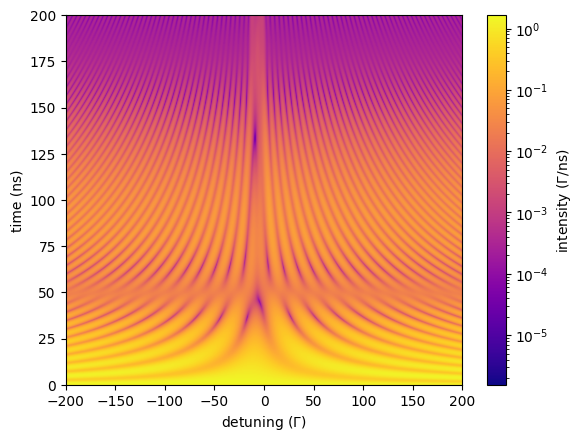

In [4]:
ets.Plot()

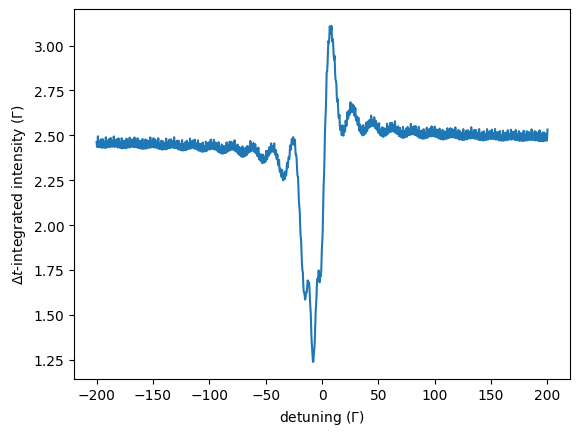

In [5]:
int_energy_time_spec.Plot()